In [1]:
# Importar librerías esenciales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Configurar los estilos de los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
from google.colab import files
uploaded = files.upload()  # Esto te permitirá subir el archivo desde tu computadora

# Leer el archivo subido
df = pd.read_excel('customer_segmentation_data.xlsx')

Saving customer_segmentation_data.xlsx to customer_segmentation_data.xlsx


In [3]:
# Mostrar las primeras filas del dataset
df.head()

# Información general del dataset
df.info()

# Descripción estadística básica
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [4]:
# Verificar valores nulos
df.isnull().sum()

# Imputar valores nulos (ejemplo usando la media)
imputer = SimpleImputer(strategy='mean')
df[['income', 'spending_score']] = imputer.fit_transform(df[['income', 'spending_score']])


In [5]:
# Convertir variables categóricas a numéricas
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [6]:
# Escalado de las características numéricas
scaler = StandardScaler()
df[['age', 'income', 'spending_score']] = scaler.fit_transform(df[['age', 'income', 'spending_score']])

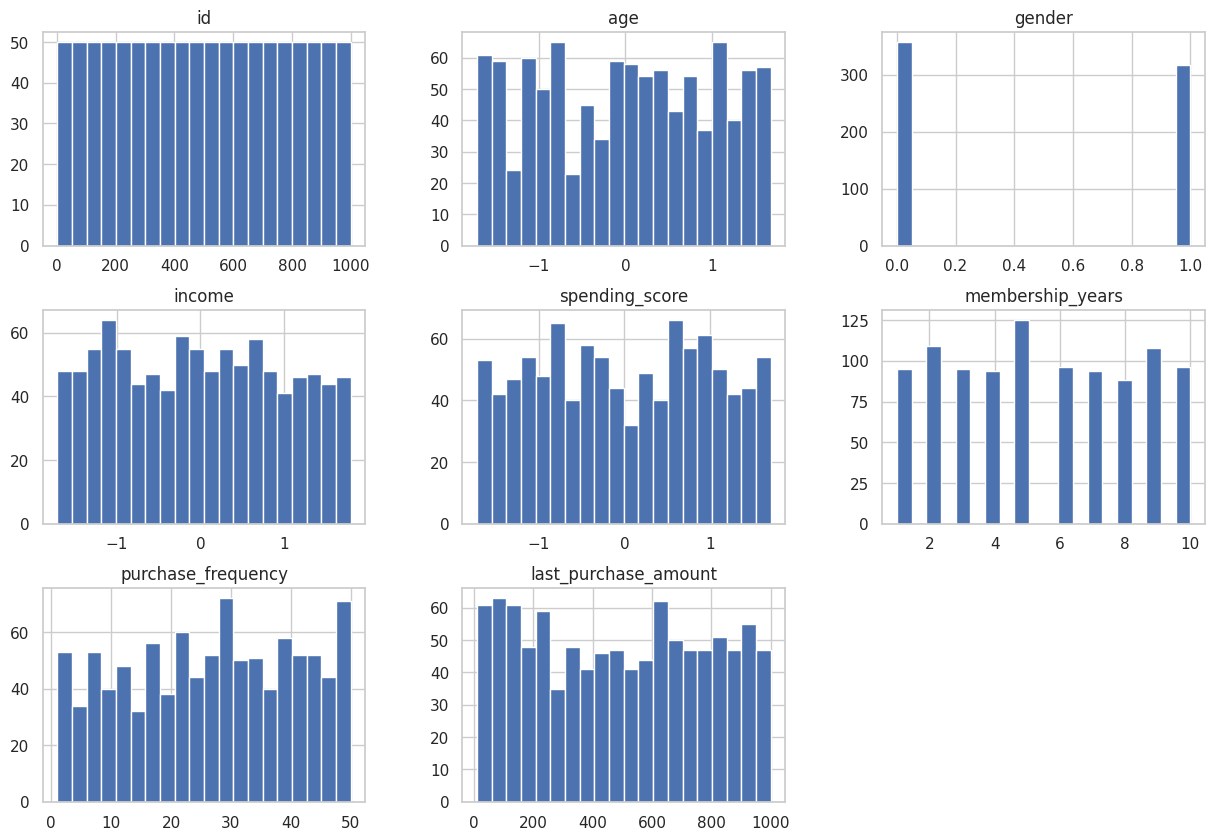

In [7]:
# Histogramas de las variables principales
df.hist(bins=20, figsize=(15, 10))
plt.show()

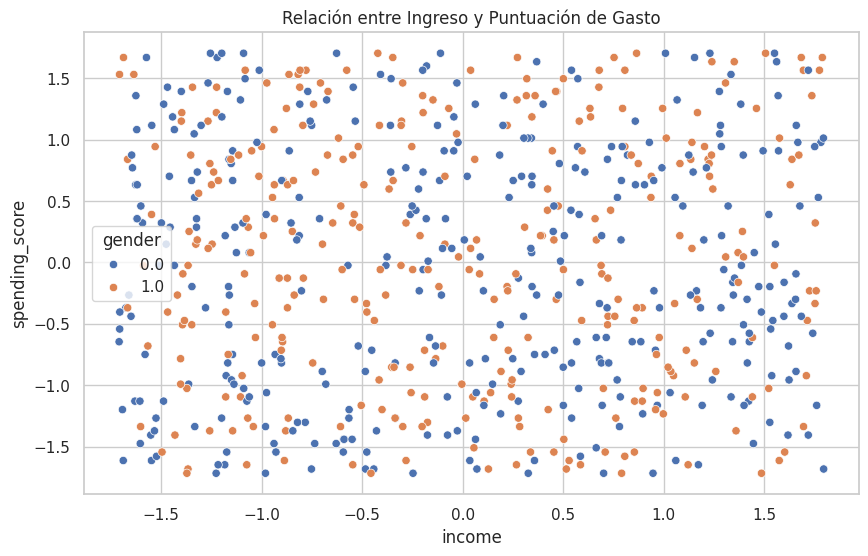

In [8]:
# Gráfico de dispersión entre ingreso y puntuación de gasto
sns.scatterplot(x='income', y='spending_score', data=df, hue='gender')
plt.title('Relación entre Ingreso y Puntuación de Gasto')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


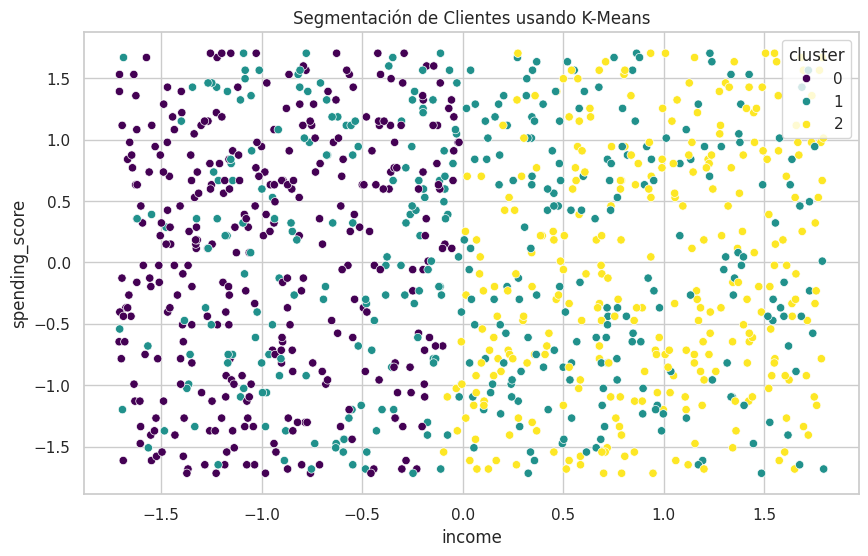

Silhouette Score: 0.25196610668972524


In [9]:
# Inicializar y ajustar el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['age', 'income', 'spending_score']])

# Visualización de los clusters
sns.scatterplot(x='income', y='spending_score', hue='cluster', data=df, palette='viridis')
plt.title('Segmentación de Clientes usando K-Means')
plt.show()

# Evaluación de la calidad de los clusters con el Silhouette Score
score = silhouette_score(df[['age', 'income', 'spending_score']], df['cluster'])
print(f'Silhouette Score: {score}')

In [11]:
# Análisis de las características de cada cluster
df.groupby('cluster').mean(numeric_only=True)

,id,age,gender,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
cluster,,,,,,,,
0,508.975610,0.566814,0.467290,-0.953416,0.047334,5.533537,26.615854,525.506006
1,491.258065,-1.070334,0.457364,0.097985,0.040236,5.395161,26.817204,464.772366
2,502.693333,0.707497,0.487562,0.920900,-0.101645,5.490000,26.300000,490.291267


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['gender'].plot(kind='hist', bins=20, title='gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['income'].plot(kind='hist', bins=20, title='income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='age', y='gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='gender', y='income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='income', y='spending_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['income']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('income', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('income')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['income']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('income', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('income')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['income']
  ys = series['gender']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('income', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('income')
_ = plt.ylabel('gender')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['income']
  ys = series['spending_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('income', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('income')
_ = plt.ylabel('spending_score')

from matplotlib import pyplot as plt
_df_12['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['gender'].plot(kind='line', figsize=(8, 4), title='gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['income'].plot(kind='line', figsize=(8, 4), title='income')
plt.gca().spines[['top', 'right']].set_visible(False)